In [86]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import numpy as np
import matplotlib.pyplot as plt


LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-04-10 17:56:32,969 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:b4:69:26:3c
2023-04-10 17:56:35,476 | INFO     |: Connected to c0:83:b4:69:26:3c


In [107]:
incoming_data = []
time = []
distance = []
speed = []
data = []
def wall_drive(uiud, byte_arr):
    # variables
    global incoming_data
    global data
    global time
    global distance
    global speed
    
    # handle incoming data
    incoming_data = ble.bytearray_to_string(byte_arr)
    data.append(incoming_data)
    
    #indexes
    time_start = incoming_data.index('T')+2
    time_end = incoming_data.index('S')-1
    speed_start = time_end + 3
    speed_end = incoming_data.index('D')-1
    distance_start = speed_end + 3
    
    # create new arrays
    time.append(float(incoming_data[time_start:time_end]))
    speed.append(float(incoming_data[speed_start:speed_end]))
    distance.append(float(incoming_data[distance_start:]))
   
distance[idx] = distance[idx]/1000

ble.start_notify(ble.uuid['RX_STRING'], wall_drive)
ble.send_command(CMD.DRIVE_AT_WALL, "")



[267105.0, 267150.0, 267189.0, 267231.0, 267276.0, 267318.0, 267361.0, 267407.0, 267447.0, 267489.0, 267533.0, 267577.0, 267622.0, 267662.0, 267704.0, 267748.0, 267788.0, 267830.0, 267875.0, 267915.0, 267957.0, 268002.0, 268044.0, 268086.0, 268130.0, 268173.0, 268212.0, 268256.0, 268302.0, 268344.0, 268386.0, 268428.0, 268473.0, 268519.0, 268559.0, 268601.0, 268645.0, 268685.0, 268728.0, 268770.0, 268813.0, 268855.0, 268897.0, 268941.0, 268981.0, 269023.0, 269068.0, 269110.0, 269153.0, 269195.0, 269240.0, 269282.0, 269324.0, 269368.0, 269410.0, 269453.0, 269498.0, 269544.0, 269589.0, 269631.0, 269674.0, 269720.0, 269760.0, 269802.0, 269848.0, 269889.0, 269932.0, 269978.0, 270025.0, 270070.0, 270112.0, 270152.0, 270195.0, 270237.0, 270279.0, 270325.0, 270371.0, 270413.0, 270459.0, 270502.0, 270544.0]
[2.029e-06, 2.024e-06, 2.024e-06, 2e-06, 2e-06, 2e-06, 2.003e-06, 2.003e-06, 1.974e-06, 1.974e-06, 1.961e-06, 1.961e-06, 1.914e-06, 1.914e-06, 1.914e-06, 1.8939999999999998e-06, 1.893999999

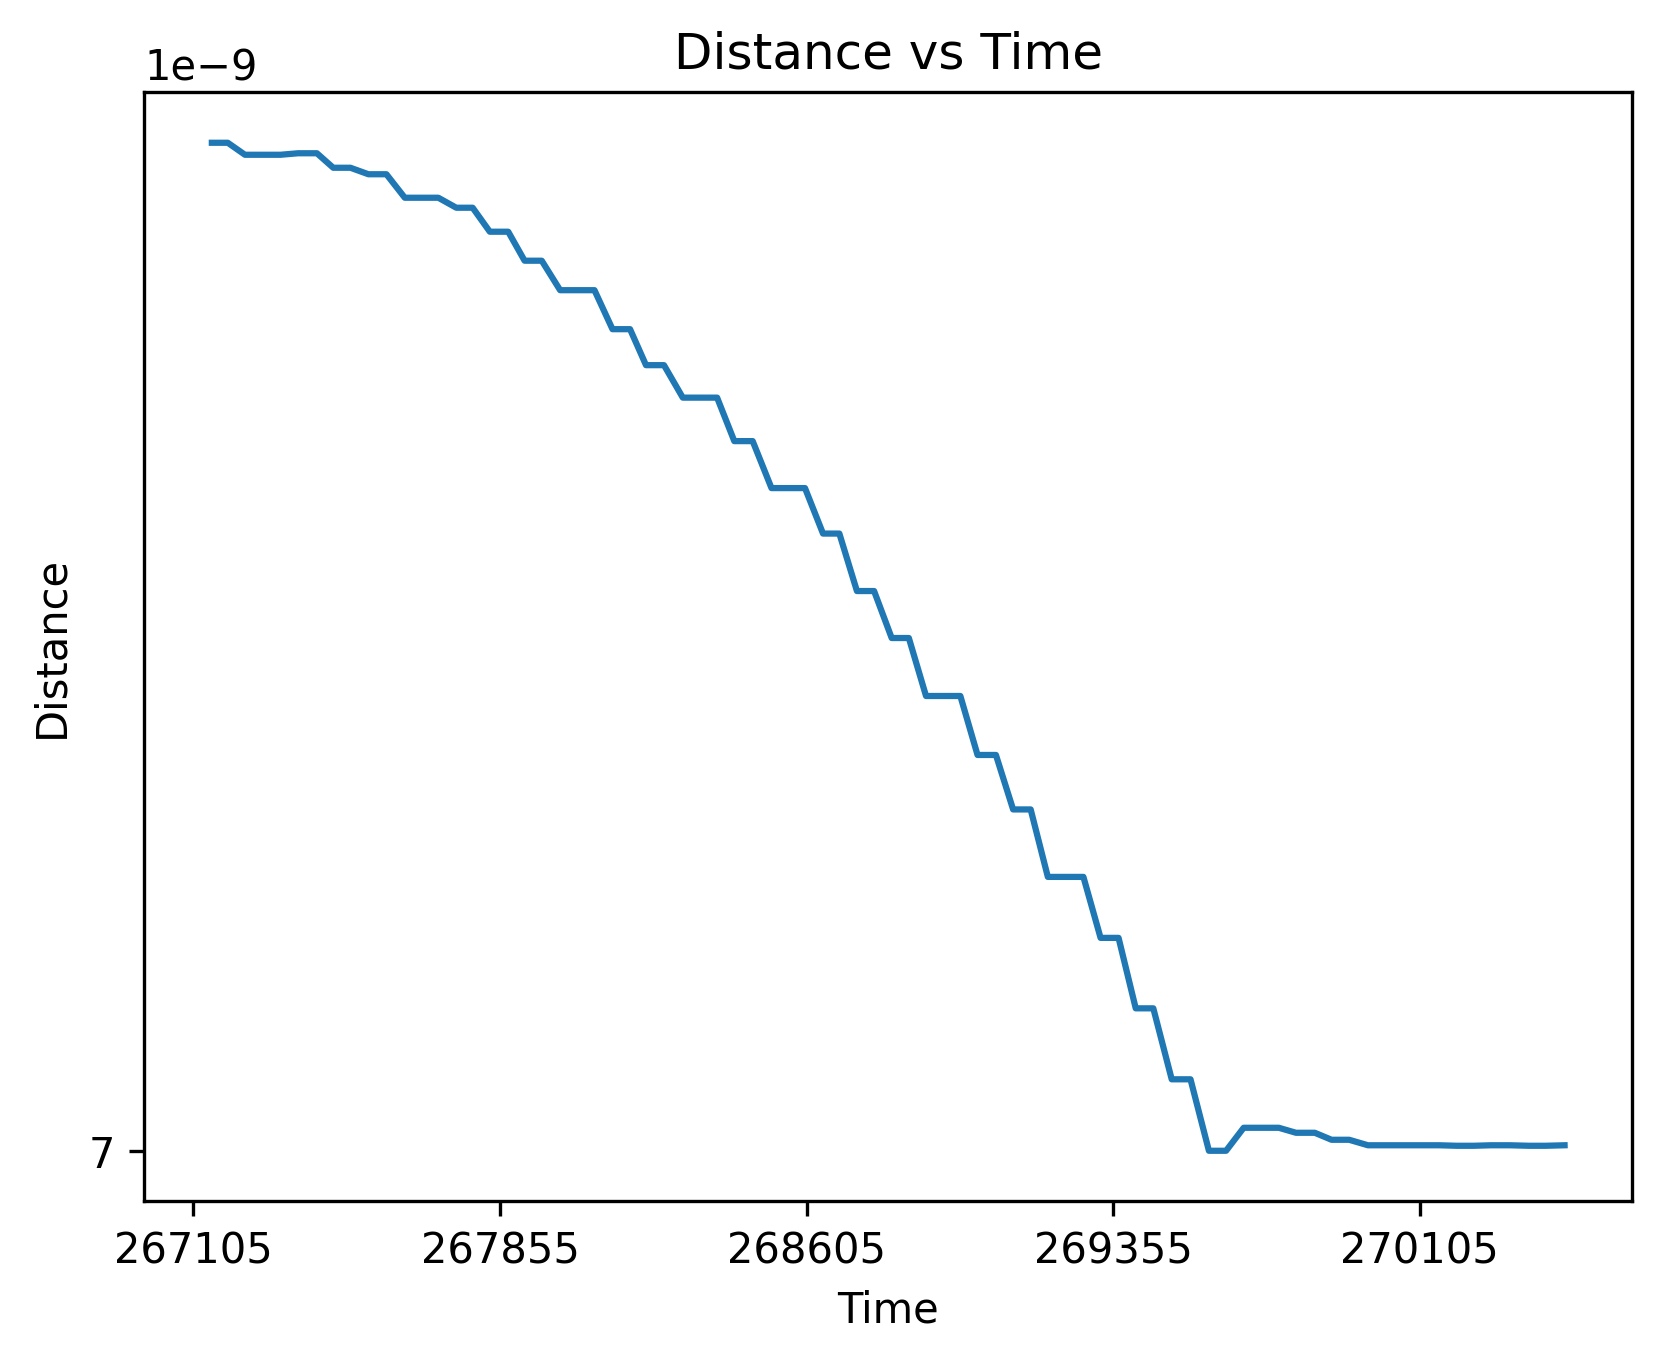

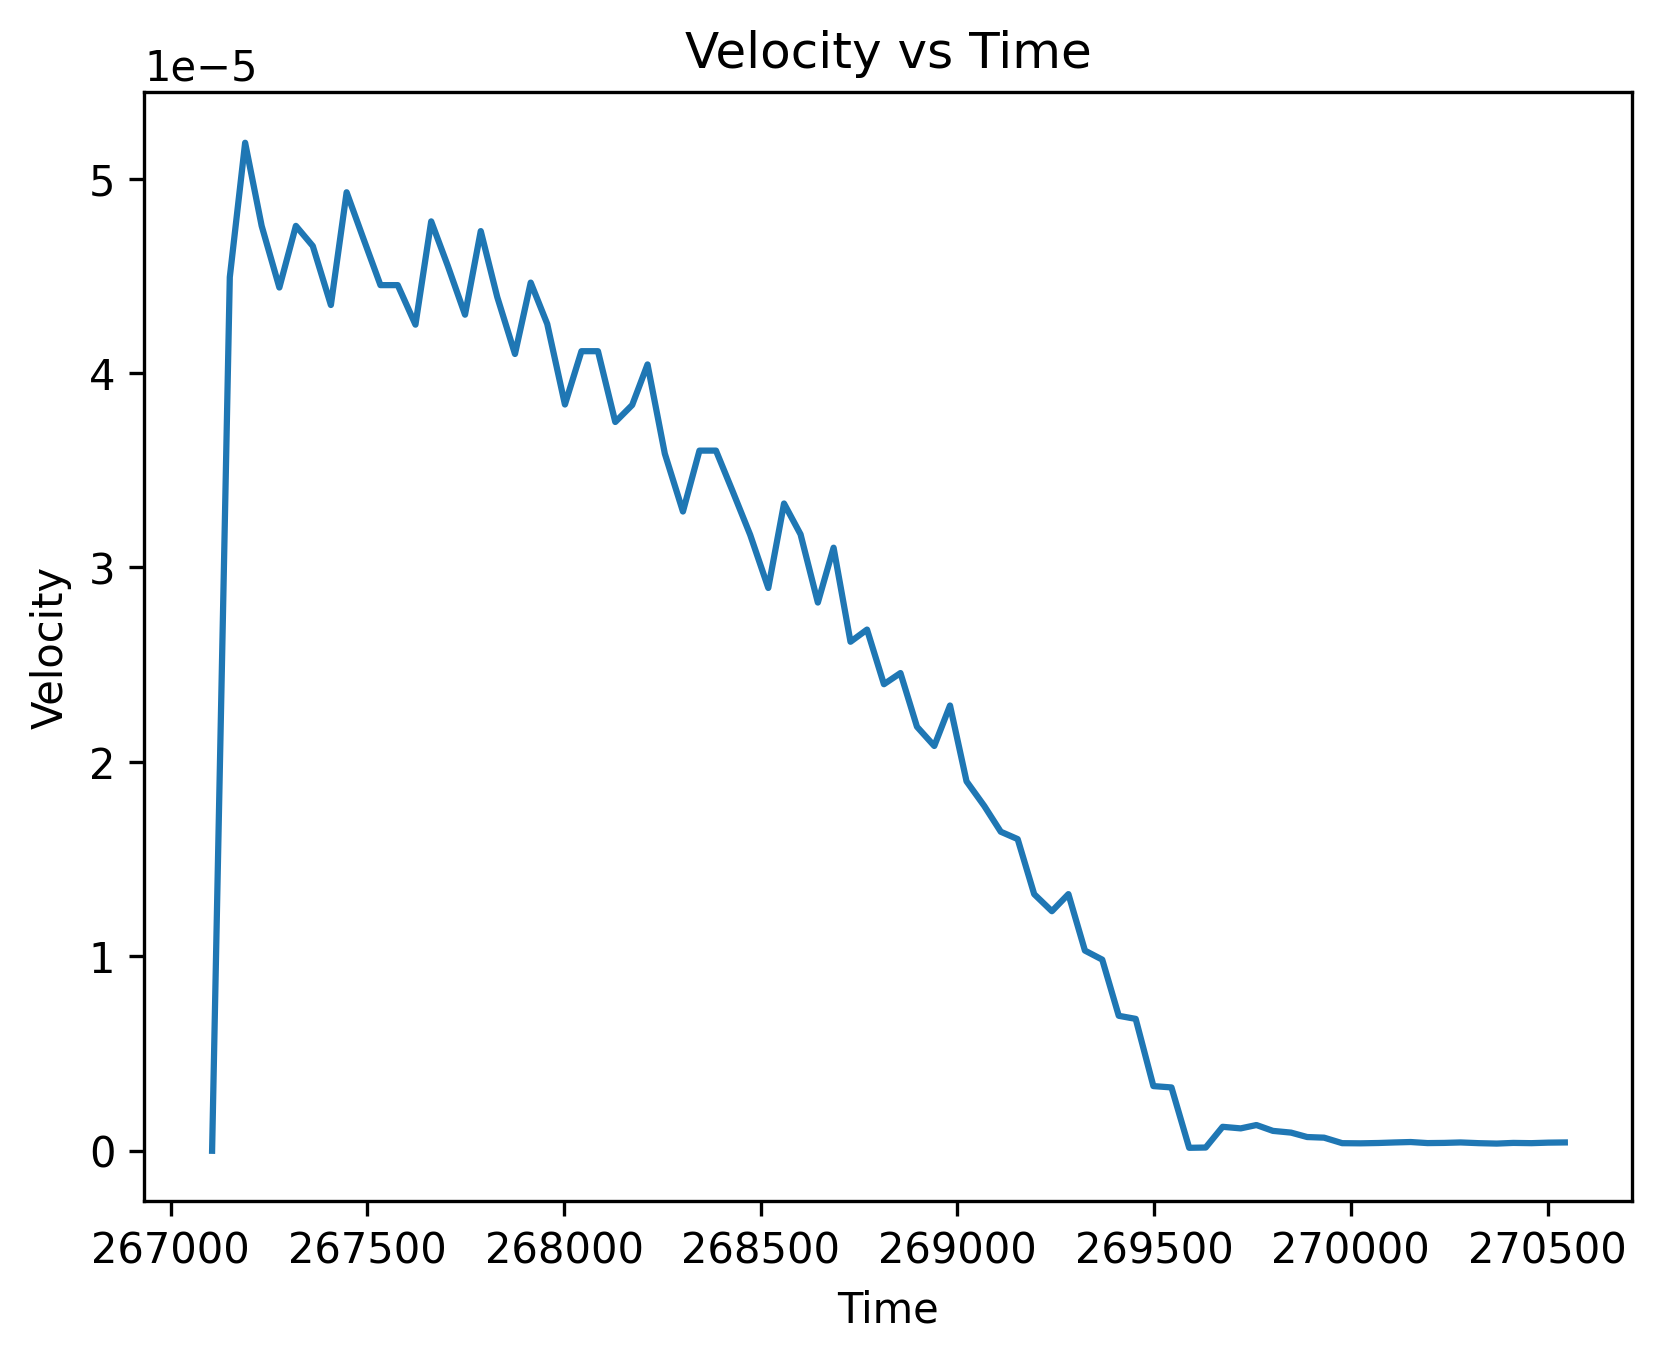

Exception: Not connected to a BLE device

In [112]:
#Adjust time and make velocity
velocity = [0]


for idx in range(len(time)):
    if(idx > 0):
        velocity.append((distance[idx] - distance[idx-1]) / (time[idx] - time[idx - 1])) 
    
print(time)
print(distance) 

#Distance 
plt.plot (time[1:len(time)-2], distance[1:len(distance)-2])
plt.xticks(np.arange(min(time), max(time), 750))
plt.yticks(np.arange(min(distance), max(distance), 100))

plt.title ('Distance vs Time')
plt.xlabel ('Time')
plt.ylabel ('Distance')
plt.show()

# # Speed
# plt.plot (time [0:], speed [0:])

# plt.title ('Speed vs Time')
# plt.xlabel ('Time')
# plt.ylabel ('Speed')
# plt.show()

# Velocity
plt.plot (time [0:], velocity [0:])
plt.title ('Velocity vs Time')
plt.xlabel ('Time')
plt.ylabel ('Velocity')
plt.show()


ble.stop_notify(ble.uuid['RX_STRING'])




In [101]:
ble.stop_notify(ble.uuid['RX_STRING'])

Exception: Not connected to a BLE device

In [58]:
ble.disconnect()

2023-04-04 19:19:43,398 | INFO     |: Disconnected from 1EC8978F-60BE-444F-8CEC-1E86F5092CAA
